In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from GBDT.GradientBoostDecisionTree import GBDTRegressor

In [2]:
data = datasets.load_boston()
x = data.data
y = data.target
x.shape

(506, 13)

In [3]:
Gbdt = GBDTRegressor(100, 0.1, 'ls', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.5)
Gbdt.fit(x, y)

GBDTRegressor(learning_rate=0.1, loss='ls', n_estimators=100, random_state=None,
              subsample=0.5, tree_params={'criterion': 'mse', 'max_depth': 3})

In [5]:
r2_score(y, Gbdt.predict(x))

0.9650159837831296

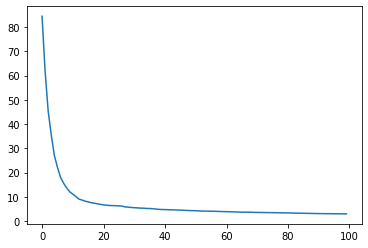

In [6]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [7]:
Gbdt.feature_importances_

array([0.09475156, 0.00349797, 0.02538516, 0.00435056, 0.06957941,
       0.19908452, 0.0694698 , 0.16173028, 0.03467604, 0.05575595,
       0.04949452, 0.0816221 , 0.15060214])

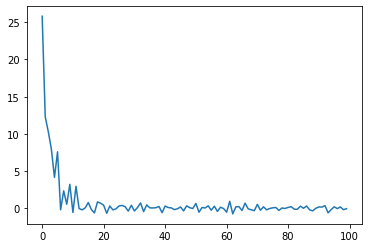

In [8]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

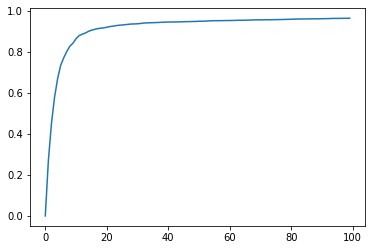

In [8]:
scores = [r2_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [4]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 100,
 'subsample': 0.5,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

In [4]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(GBDTRegressor)

 ## Sklearn GBDT

In [14]:
gbr = GradientBoostingRegressor(criterion='mse', loss='ls', n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5)
gbr.fit(x, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
r2_score(y, gbr.predict(x))

0.9734637729432416

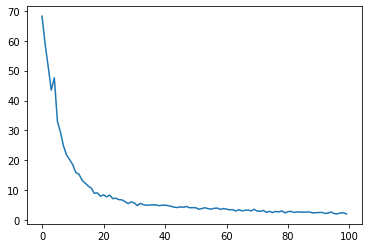

In [22]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [17]:
gbr.feature_importances_

array([4.61618938e-02, 5.41468070e-04, 4.87974508e-03, 3.13901099e-04,
       3.07070654e-02, 4.02340019e-01, 1.44636674e-02, 8.57871463e-02,
       4.89127514e-03, 2.68888361e-02, 3.14259591e-02, 1.60560739e-02,
       3.35542949e-01])

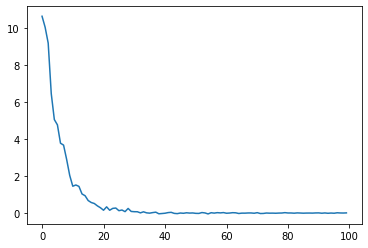

In [19]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

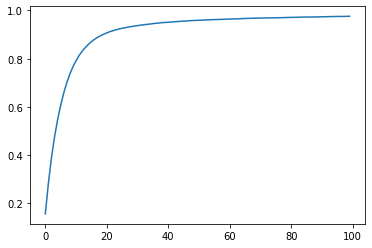

In [10]:
scores = [r2_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)